# Task 4 
### Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.

## Load and Clean the Dataset

In [2]:
import pandas as pd

# Load the dataset
df = pd.read_csv('twitter/twitter_training.csv')

# Display the first few rows of the dataset
df.head()


,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [3]:
df

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...
...,...,...,...,...
74676,9200,Nvidia,Positive,Just realized that the Windows partition of my...
74677,9200,Nvidia,Positive,Just realized that my Mac window partition is ...
74678,9200,Nvidia,Positive,Just realized the windows partition of my Mac ...
74679,9200,Nvidia,Positive,Just realized between the windows partition of...


In [4]:
df.columns = ['ID', 'brand', 'sentiment', 'text']

In [5]:
df.head()

,ID,brand,sentiment,text
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [6]:

import re

# Check for missing values and drop if necessary
df.dropna(inplace=True)

# Function to clean text data
def clean_text(text):
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'@\w+', '', text)     # Remove mentions
    text = re.sub(r'#\w+', '', text)     # Remove hashtags
    text = re.sub(r'\d+', '', text)      # Remove numbers
    text = re.sub(r'[^\w\s]', '', text)  # Remove punctuation
    text = text.lower().strip()          # Convert to lowercase and strip whitespaces
    return text

# Apply the cleaning function to the text column
df['cleaned_text'] = df['text'].apply(clean_text)


## Load and Clean the Dataset

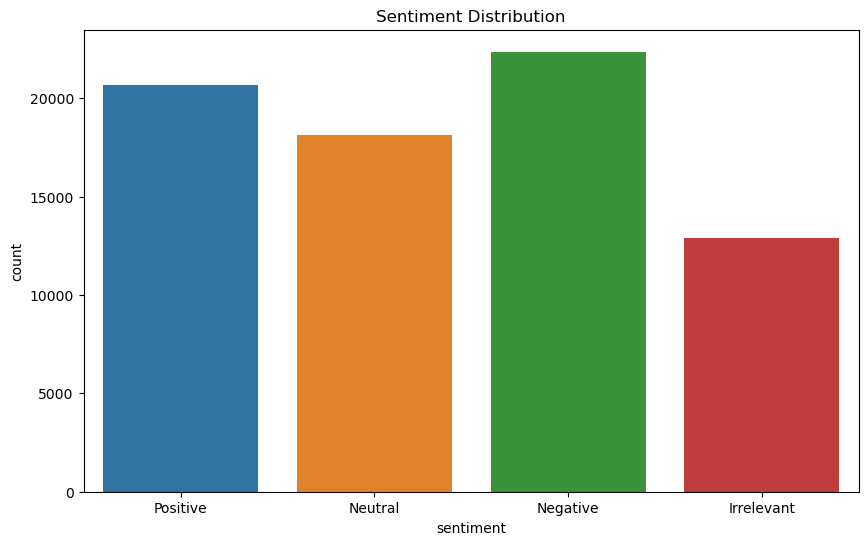

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution')
plt.show()


## Text Preprocessing and Model Training

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

# Vectorize the text data
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['cleaned_text'])

# Encode the sentiment labels
encoder = LabelEncoder()
y = encoder.fit_transform(df['sentiment'])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test, train_idx, test_idx = train_test_split(X, y, df.index, test_size=0.2, random_state=42)

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.52      0.35      0.42      2624
           1       0.62      0.69      0.66      4463
           2       0.53      0.52      0.53      3589
           3       0.61      0.66      0.63      4123

    accuracy                           0.58     14799
   macro avg       0.57      0.56      0.56     14799
weighted avg       0.58      0.58      0.58     14799

[[ 921  620  460  623]
 [ 261 3090  612  500]
 [ 340  714 1883  652]
 [ 255  544  599 2725]]


c:\Users\dhana\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
confusion_matrix(y_test, y_pred)

array([[ 921,  620,  460,  623],
       [ 261, 3090,  612,  500],
       [ 340,  714, 1883,  652],
       [ 255,  544,  599, 2725]], dtype=int64)

## Visualize Predicted Sentiments

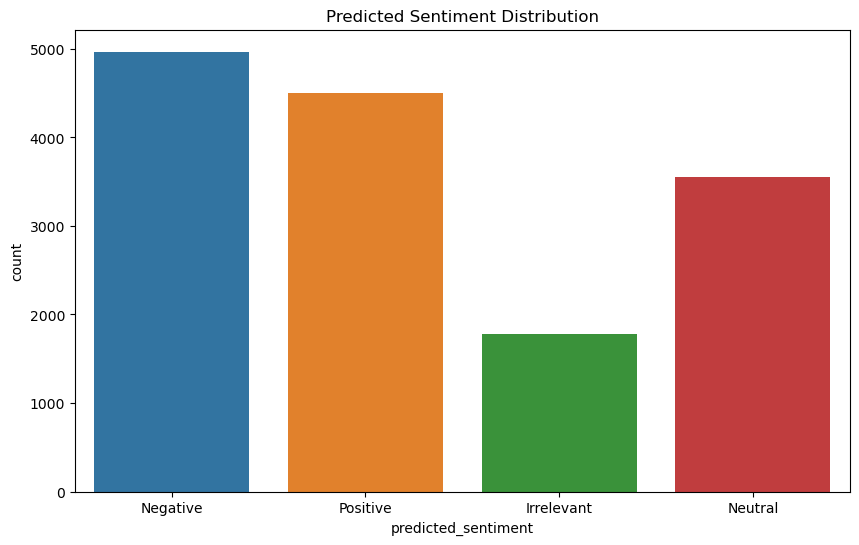

In [10]:
# Predict probabilities
y_prob = model.predict_proba(X_test)

# Create a DataFrame with the test set indices
df_test = df.loc[test_idx].copy()

# Add the predictions and probabilities to the DataFrame
df_test['predicted_sentiment'] = encoder.inverse_transform(y_pred)
df_test['probability'] = y_prob.max(axis=1)

# Plot the predicted sentiment distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='predicted_sentiment', data=df_test)
plt.title('Predicted Sentiment Distribution')
plt.show()


## Analyze Sentiments by Brands

In [11]:
# Define a function to identify brand mentions
def extract_brands(text):
    brands = []
    if 'apple' in text:
        brands.append('Apple')
    if 'google' in text:
        brands.append('Google')
    if 'microsoft' in text:
        brands.append('Microsoft')
    return brands

# Apply the function to create a new column
df['brands'] = df['cleaned_text'].apply(extract_brands)


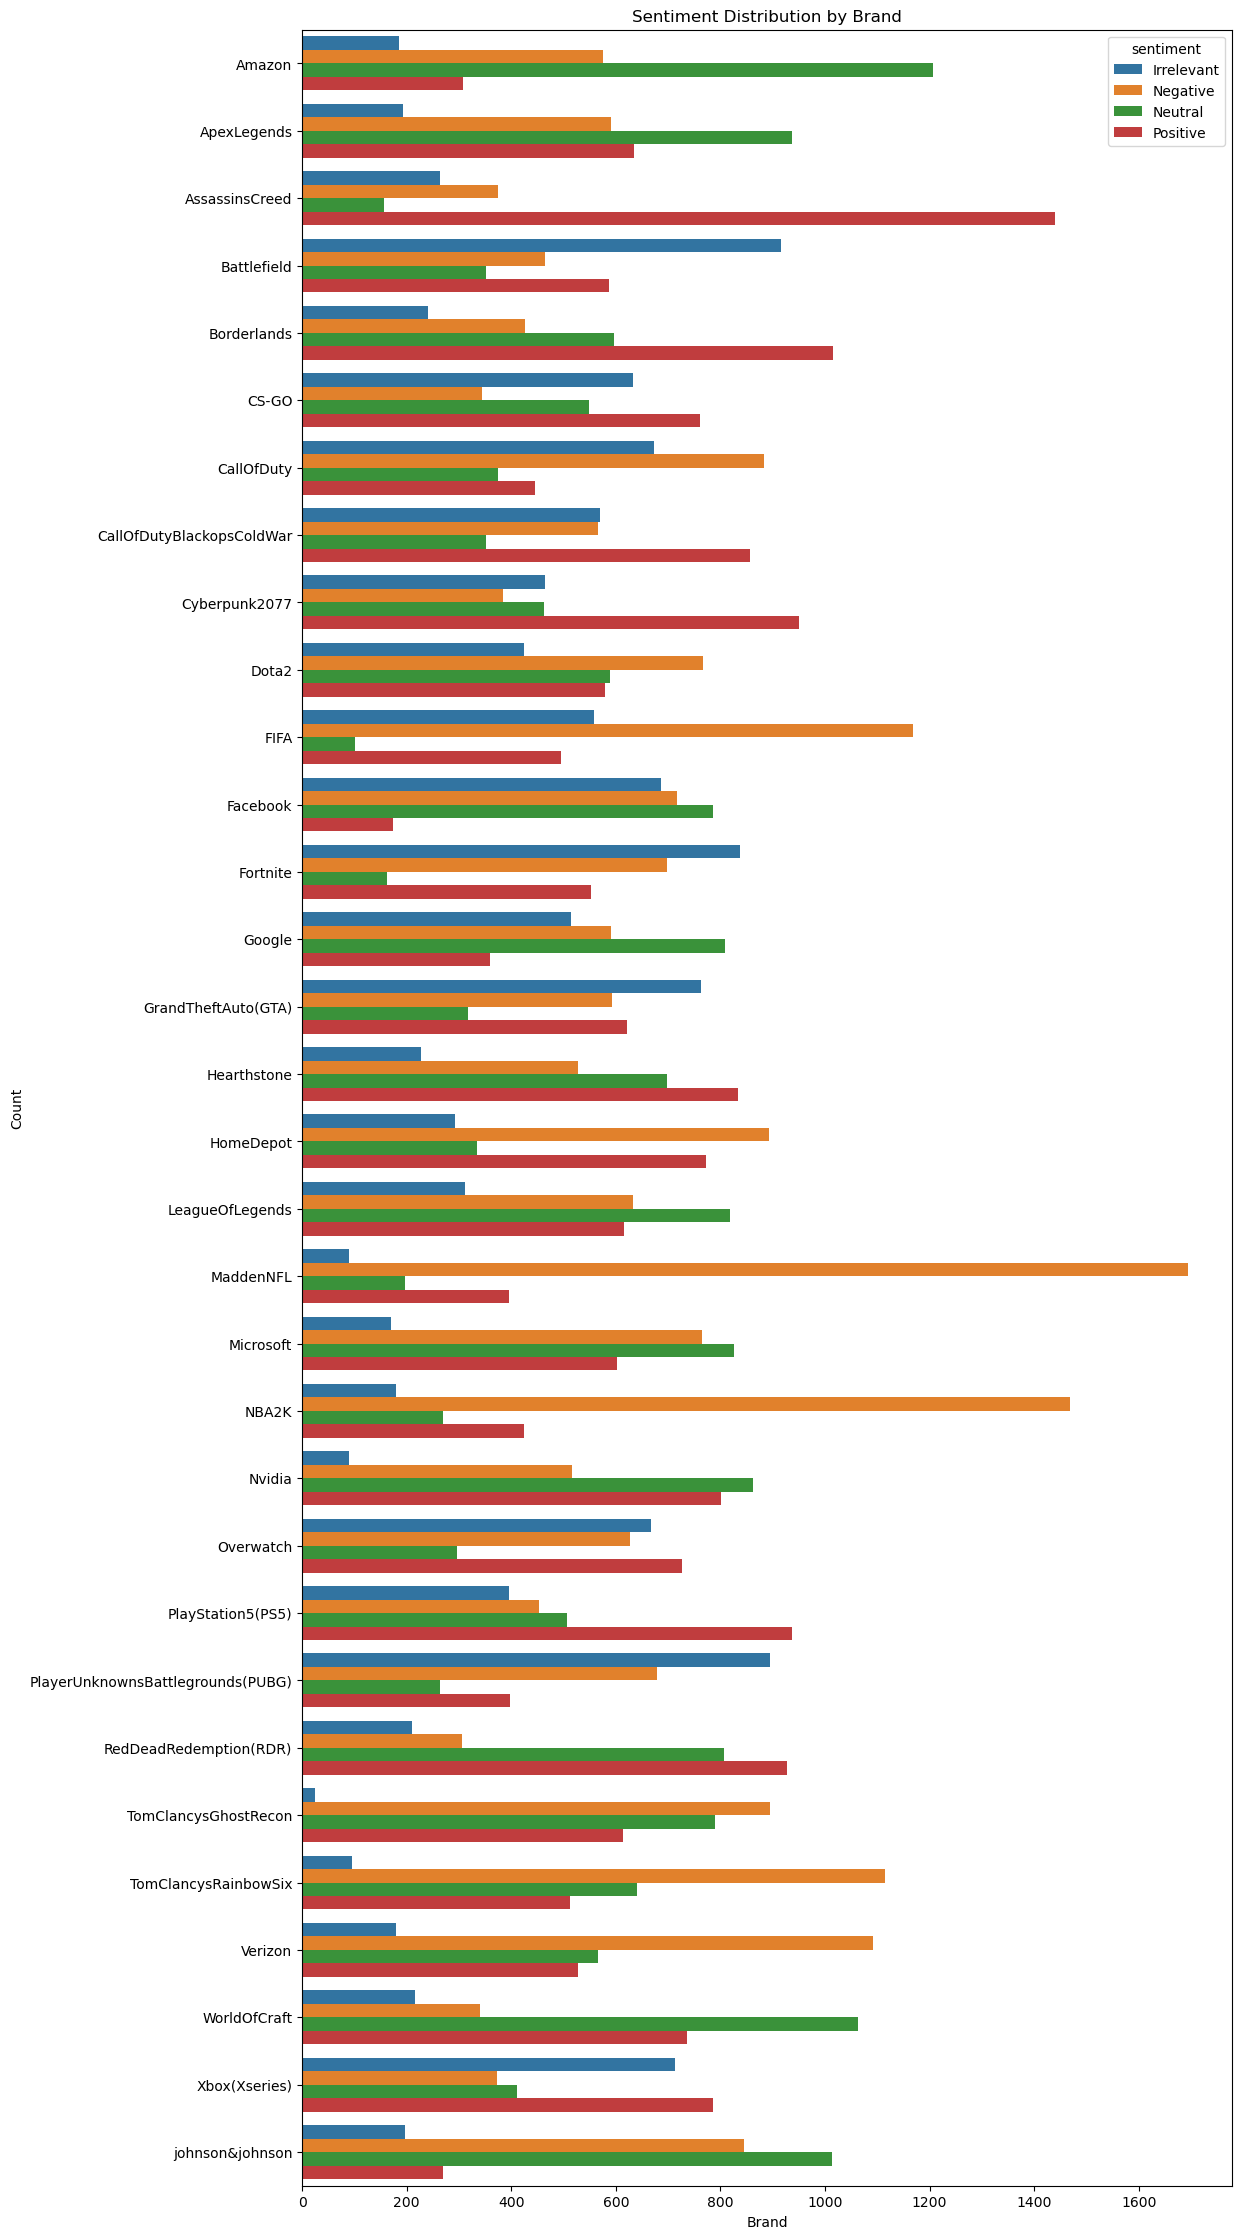

In [12]:
# Expand the list of brands into separate rows
df_exploded = df.explode('brand')

# Group by brands and sentiment to get counts
brand_sentiment_counts = df_exploded.groupby(['brand', 'sentiment']).size().reset_index(name='counts')

# Visualize sentiment distribution for each brand
plt.figure(figsize=(12, 28))
sns.barplot(y='brand', x='counts', hue='sentiment', data=brand_sentiment_counts)
plt.title('Sentiment Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.show()


## Heatmap for Confusion Matrix

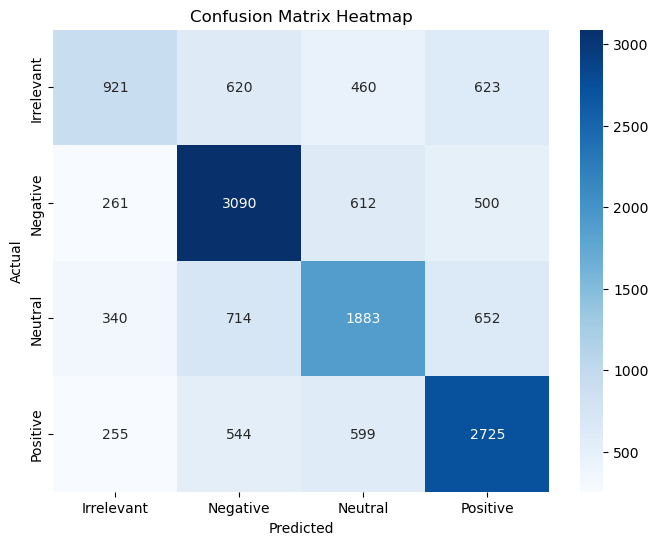

In [13]:
from sklearn.metrics import confusion_matrix

# Compute the confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm_df = pd.DataFrame(cm, index=encoder.classes_, columns=encoder.classes_)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix Heatmap')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


## Box Plot for Sentiment Scores

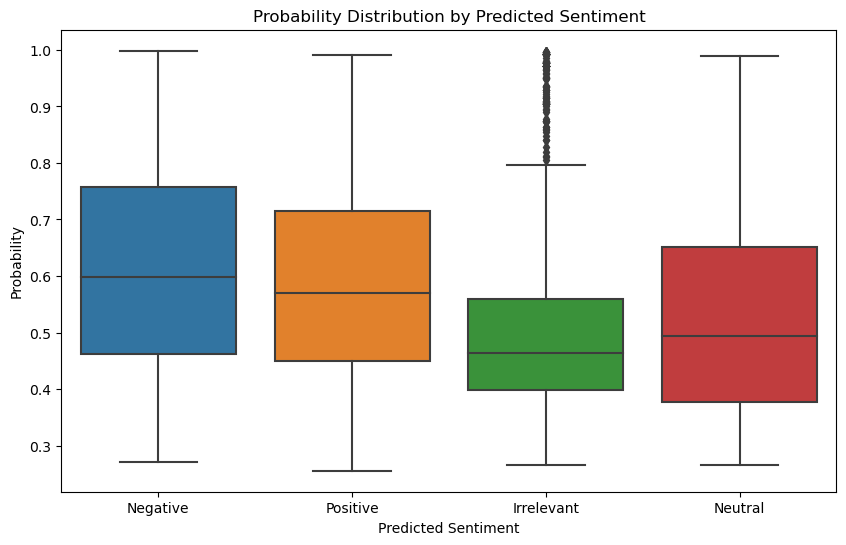

In [14]:
# Box plot for sentiment probabilities
plt.figure(figsize=(10, 6))
sns.boxplot(x='predicted_sentiment', y='probability', data=df_test)
plt.title('Probability Distribution by Predicted Sentiment')
plt.xlabel('Predicted Sentiment')
plt.ylabel('Probability')
plt.show()


In [15]:
# Get the count of each distinct value in the 'entity' column
entity_counts = df['brand'].value_counts()

# Print the counts
print("Count of each distinct value in 'entity' column:")
print(entity_counts)


Count of each distinct value in 'entity' column:
brand
MaddenNFL                            2377
LeagueOfLegends                      2377
CallOfDuty                           2376
Verizon                              2365
TomClancysRainbowSix                 2364
Facebook                             2362
Microsoft                            2361
Dota2                                2359
WorldOfCraft                         2357
ApexLegends                          2353
NBA2K                                2343
CallOfDutyBlackopsColdWar            2343
FIFA                                 2324
johnson&johnson                      2324
TomClancysGhostRecon                 2321
Battlefield                          2316
Overwatch                            2316
GrandTheftAuto(GTA)                  2293
HomeDepot                            2292
PlayStation5(PS5)                    2291
Hearthstone                          2286
CS-GO                                2284
Xbox(Xseries)        

In [16]:
# Get the distinct values in the 'entity' column
distinct = df['brand'].unique()
distinct

array(['Borderlands', 'CallOfDutyBlackopsColdWar', 'Amazon', 'Overwatch',
       'Xbox(Xseries)', 'NBA2K', 'Dota2', 'PlayStation5(PS5)',
       'WorldOfCraft', 'CS-GO', 'Google', 'AssassinsCreed', 'ApexLegends',
       'LeagueOfLegends', 'Fortnite', 'Microsoft', 'Hearthstone',
       'Battlefield', 'PlayerUnknownsBattlegrounds(PUBG)', 'Verizon',
       'HomeDepot', 'FIFA', 'RedDeadRedemption(RDR)', 'CallOfDuty',
       'TomClancysRainbowSix', 'Facebook', 'GrandTheftAuto(GTA)',
       'MaddenNFL', 'johnson&johnson', 'Cyberpunk2077',
       'TomClancysGhostRecon', 'Nvidia'], dtype=object)

In [17]:
sorted(distinct, reverse=True)

['johnson&johnson',
 'Xbox(Xseries)',
 'WorldOfCraft',
 'Verizon',
 'TomClancysRainbowSix',
 'TomClancysGhostRecon',
 'RedDeadRedemption(RDR)',
 'PlayerUnknownsBattlegrounds(PUBG)',
 'PlayStation5(PS5)',
 'Overwatch',
 'Nvidia',
 'NBA2K',
 'Microsoft',
 'MaddenNFL',
 'LeagueOfLegends',
 'HomeDepot',
 'Hearthstone',
 'GrandTheftAuto(GTA)',
 'Google',
 'Fortnite',
 'Facebook',
 'FIFA',
 'Dota2',
 'Cyberpunk2077',
 'CallOfDutyBlackopsColdWar',
 'CallOfDuty',
 'CS-GO',
 'Borderlands',
 'Battlefield',
 'AssassinsCreed',
 'ApexLegends',
 'Amazon']

## Top Brand sentimment distribution

In [18]:
top_brands = ['TomClancysRainbowSix', 'Johnson&Johnson', 'Xbox(Xseries)', 'WorldOfCraft', 'Verizon' ]
df_top_brands = df[df['brand'].isin(top_brands)]

# Display the first few rows to verify
df_top_brands.head()

,ID,brand,sentiment,text,cleaned_text,brands
9311,12801,Xbox(Xseries),Irrelevant,Pretty sure that Tetris Effect is already the ...,pretty sure that tetris effect is already the ...,[]
9312,12801,Xbox(Xseries),Irrelevant,Pretty sure that Tetris Effect is already the ...,pretty sure that tetris effect is already the ...,[]
9313,12801,Xbox(Xseries),Irrelevant,Pretty is confident that the Tetris Effect is ...,pretty is confident that the tetris effect is ...,[]
9314,12801,Xbox(Xseries),Irrelevant,Pretty sure that Tetris Effect may already the...,pretty sure that tetris effect may already the...,[]
9315,12801,Xbox(Xseries),Irrelevant,1 Pretty sure that Tetris Effect is already co...,pretty sure that tetris effect is already cons...,[]


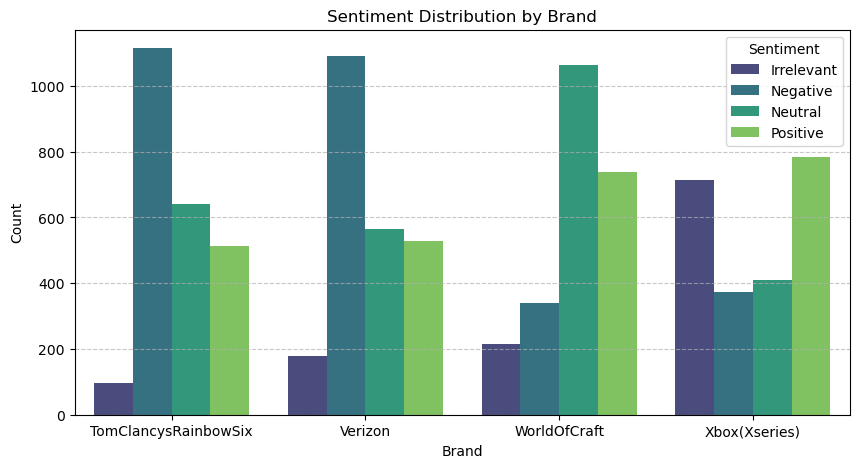

In [19]:
brand_sentiment_counts = df_top_brands.groupby(['brand', 'sentiment']).size().reset_index(name='counts')

# Plotting sentiment distribution
plt.figure(figsize=(10, 5))
sns.barplot(x='brand', y='counts', hue='sentiment', data=brand_sentiment_counts, palette='viridis')
plt.title('Sentiment Distribution by Brand')
plt.xlabel('Brand')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title='Sentiment')
plt.show()